In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import cv2

Linki
https://github.com/dqj5182/egyptian_hieroglyph_classification_convnet
https://drive.google.com/drive/folders/1bhnMJ8NbCa-qw53EKy-olZp3cJKZU_jc
https://drive.google.com/drive/folders/1X5HdFvgWJOVtA-GxBLr1K_0FHJS2RZcZ
https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9528382&tag=1

In [2]:
data_dir = 'C:/Users/marek/PycharmProjects/egyptian_hieroglyph_classification/EgyptianHieroglyphDataset_Original/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')

In [3]:
def readHieroglyphData(data_dir):
    images = []
    targets = []
    for hier in os.listdir(data_dir):
        for img in os.listdir(os.path.join(data_dir, hier)):
            targets.append(hier)
            images.append(np.asarray(Image.open(os.path.join(data_dir, hier, img))))
    return images, targets

In [4]:
def resizeImageData(data, image_size):
    resize_func = lambda img: cv2.resize(img, (image_size, image_size))
    resized_data = list(map(resize_func, data))
    return resized_data

In [5]:
images_train, targets_train = readHieroglyphData(train_dir)

In [6]:
images_test, targets_test = readHieroglyphData(test_dir)

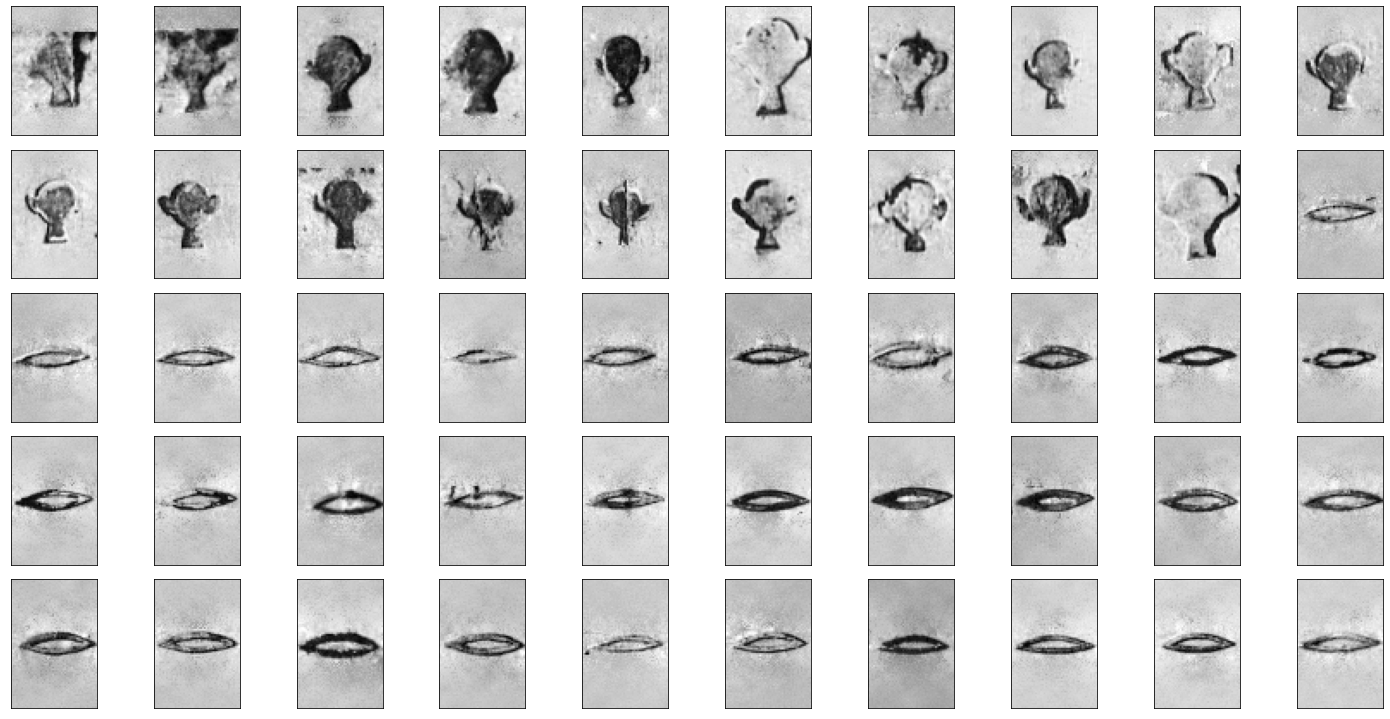

In [7]:
def overview(start, end, X):
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end):
        ax = fig.add_subplot(10,10,i+1)
        ax.imshow(X[i], cmap='gray')
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0, 50, images_train)

D2


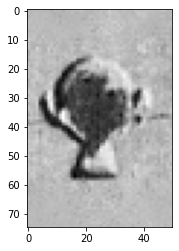

In [8]:
plt.imshow(images_test[0], cmap='gray')
print(targets_test[0])

In [9]:
len(targets_train)

2467

In [10]:
len(targets_test)

635

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(targets_train)
LabelEncoder()
print(list(le.classes_))

['D2', 'D21', 'D36', 'D4', 'D46', 'D58', 'E23', 'E34', 'F31', 'F35', 'G1', 'G17', 'G43', 'I10', 'I9', 'M17', 'M23', 'N35', 'O1', 'O34', 'O4', 'O49', 'Q1', 'Q3', 'R4', 'R8', 'S29', 'S34', 'U7', 'V13', 'V28', 'V30', 'V31', 'W11', 'W24', 'X1', 'X8', 'Y1', 'Y5', 'Z1']


In [12]:
labels_train = le.transform(targets_train)
labels_test = le.transform(targets_test)

In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

num_labels = len(le.classes_)
X = np.expand_dims(images_train, -1)
X = X/255.
Y = to_categorical(labels_train, num_labels)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [14]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
               input_shape=(75, 50, 1)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(392))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(num_labels))
model.add(layers.Activation('softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 50, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 75, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 73, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 73, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 24, 32)        0

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

run_hist = model.fit(
    np.array(x_train), np.array(y_train),
    epochs=10, 
    validation_data=(np.array(x_test), np.array(y_test)))

Epoch 1/10
62/62 [==============================] - 9s 37ms/step - loss: 2.0898 - accuracy: 0.7293 - val_loss: 6.6415 - val_accuracy: 0.0425
Epoch 2/10
62/62 [==============================] - 2s 28ms/step - loss: 0.3095 - accuracy: 0.9260 - val_loss: 5.6422 - val_accuracy: 0.0972
Epoch 3/10
62/62 [==============================] - 2s 26ms/step - loss: 0.1504 - accuracy: 0.9589 - val_loss: 5.9854 - val_accuracy: 0.1559
Epoch 4/10
62/62 [==============================] - 2s 26ms/step - loss: 0.0796 - accuracy: 0.9777 - val_loss: 6.3123 - val_accuracy: 0.2389
Epoch 5/10
62/62 [==============================] - 2s 26ms/step - loss: 0.0673 - accuracy: 0.9818 - val_loss: 5.7154 - val_accuracy: 0.3826
Epoch 6/10
62/62 [==============================] - 2s 27ms/step - loss: 0.0446 - accuracy: 0.9883 - val_loss: 1.3232 - val_accuracy: 0.6842
Epoch 7/10
62/62 [==============================] - 2s 26ms/step - loss: 0.0262 - accuracy: 0.9909 - val_loss: 0.6487 - val_accuracy: 0.8279
Epoch 8/10
62

In [17]:
images_test_dim = np.expand_dims(images_test, -1)
labels_test_cat = to_categorical(labels_test, num_labels)
scores = model.evaluate(images_test_dim, labels_test_cat, batch_size=64)
print(scores)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

10/10 [==============================] - 1s 47ms/step - loss: 2951.5608 - accuracy: 0.0772
[2951.560791015625, 0.07716535776853561]
Loss: 2951.560791015625
Accuracy: 0.07716535776853561


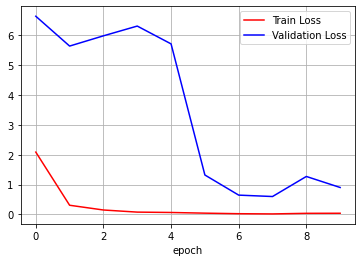

In [18]:
plt.plot(run_hist.history['loss'], color='r', label='Train Loss')
plt.plot(run_hist.history['val_loss'], color='b', label='Validation Loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

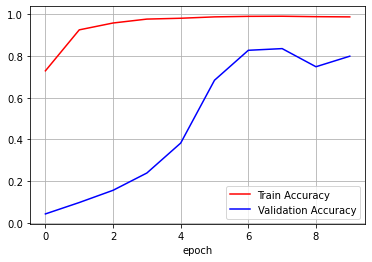

In [19]:
plt.plot(run_hist.history['accuracy'], color='r', label='Train Accuracy')
plt.plot(run_hist.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

In [20]:
images_test32 = resizeImageData(images_test, 32)
images_train32 = resizeImageData(images_train, 32)

In [21]:
X_32 = np.expand_dims(images_train32, -1)
X_32 = X_32/255.
Y = to_categorical(labels_train, num_labels)
x_train32, x_test32, y_train, y_test = train_test_split(X_32, Y, test_size=0.20, random_state=42)

In [22]:
model32 = models.Sequential()
model32.add(layers.Conv2D(32, (3, 3), padding='same',
               input_shape=(32, 32, 1)))
model32.add(layers.Activation('relu'))
model32.add(layers.Conv2D(32, (3, 3)))
model32.add(layers.Activation('relu'))
model32.add(layers.BatchNormalization())
model32.add(layers.MaxPooling2D(pool_size=(2, 2)))
model32.add(layers.Dropout(0.25))

model32.add(layers.Conv2D(64, (3, 3), padding='same'))
model32.add(layers.Activation('relu'))
model32.add(layers.Conv2D(64, (3, 3)))
model32.add(layers.Activation('relu'))
model32.add(layers.BatchNormalization())
model32.add(layers.MaxPooling2D(pool_size=(2, 2)))
model32.add(layers.Dropout(0.25))

model32.add(layers.Flatten())

model32.add(layers.Dense(392))
model32.add(layers.Activation('relu'))
model32.add(layers.Dropout(0.1))

model32.add(layers.Dense(num_labels))
model32.add(layers.Activation('softmax'))

In [23]:
model32.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)       

In [24]:
model32.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

run_hist32 = model32.fit(
    np.array(x_train32), np.array(y_train),
    epochs=10, 
    validation_data=(np.array(x_test32), np.array(y_test)))

Epoch 1/10
62/62 [==============================] - 2s 17ms/step - loss: 1.3775 - accuracy: 0.6797 - val_loss: 4.5689 - val_accuracy: 0.0000e+00
Epoch 2/10
62/62 [==============================] - 1s 10ms/step - loss: 0.3904 - accuracy: 0.8991 - val_loss: 7.9010 - val_accuracy: 0.0000e+00
Epoch 3/10
62/62 [==============================] - 1s 10ms/step - loss: 0.2147 - accuracy: 0.9422 - val_loss: 9.7892 - val_accuracy: 0.0000e+00
Epoch 4/10
62/62 [==============================] - 1s 10ms/step - loss: 0.1963 - accuracy: 0.9427 - val_loss: 7.0345 - val_accuracy: 0.0304
Epoch 5/10
62/62 [==============================] - 1s 10ms/step - loss: 0.1061 - accuracy: 0.9610 - val_loss: 8.0042 - val_accuracy: 0.0000e+00
Epoch 6/10
62/62 [==============================] - 1s 10ms/step - loss: 0.1092 - accuracy: 0.9696 - val_loss: 6.3650 - val_accuracy: 0.1073
Epoch 7/10
62/62 [==============================] - 1s 10ms/step - loss: 0.1181 - accuracy: 0.9574 - val_loss: 3.1807 - val_accuracy: 0.34

In [25]:
images_test32_dim = np.expand_dims(images_test32, -1)
labels_test_cat = to_categorical(labels_test, num_labels)
scores = model32.evaluate(images_test32_dim, labels_test_cat, batch_size=64)
print(scores)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

10/10 [==============================] - 1s 18ms/step - loss: 98.2516 - accuracy: 0.7039
[98.25160217285156, 0.7039369940757751]
Loss: 98.25160217285156
Accuracy: 0.7039369940757751


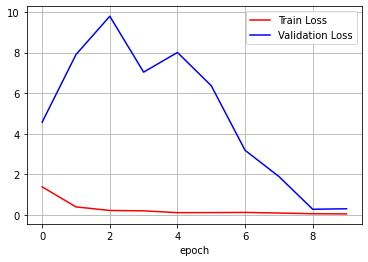

In [26]:
plt.plot(run_hist32.history['loss'], color='r', label='Train Loss')
plt.plot(run_hist32.history['val_loss'], color='b', label='Validation Loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

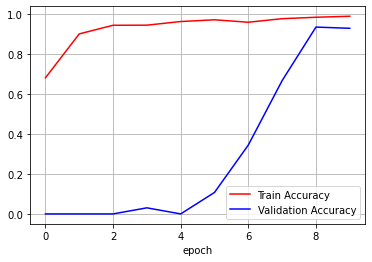

In [27]:
plt.plot(run_hist32.history['accuracy'], color='r', label='Train Accuracy')
plt.plot(run_hist32.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

In [28]:
from tensorflow.keras.applications import ResNet50


image_shape = (75, 50, 3)
base_model = ResNet50(include_top=False, input_shape=image_shape, pooling = 'avg', weights = 'imagenet')

modelResNet = models.Sequential()
modelResNet.add(base_model)
modelResNet.add(layers.Dropout(0.2))
modelResNet.add(layers.Dense(128, activation="relu"))
modelResNet.add(layers.Dropout(0.2))
modelResNet.add(layers.Dense(num_labels, activation = 'softmax'))

In [29]:
modelResNet.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 40)                5160      
Total params: 23,855,144
Trainable params: 23,802,024
Non-trainable params: 53,120
_________________________________________________________________


In [30]:
#https://stackoverflow.com/questions/51995977/how-can-i-use-a-pre-trained-neural-network-with-grayscale-images
train_images_rgb = np.repeat(np.array(images_train)[..., np.newaxis], 3, -1)
test_images_rgb = np.repeat(np.array(images_test)[..., np.newaxis], 3, -1)
X_rgb = train_images_rgb/255.
Y = to_categorical(labels_train, num_labels)
x_train, x_test, y_train, y_test = train_test_split(X_rgb, Y, test_size=0.20, random_state=42)

In [31]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

C:\Users\marek\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [32]:
modelResNet.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

train_history = modelResNet.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test))

Epoch 1/10
31/31 [==============================] - 16s 321ms/step - loss: 1.1717 - accuracy: 0.7253 - val_loss: 60.4950 - val_accuracy: 0.1032
Epoch 2/10
31/31 [==============================] - 7s 234ms/step - loss: 0.3281 - accuracy: 0.9098 - val_loss: 42.7589 - val_accuracy: 0.1113
Epoch 3/10
31/31 [==============================] - 7s 235ms/step - loss: 0.2113 - accuracy: 0.9463 - val_loss: 3.9965 - val_accuracy: 0.1113
Epoch 4/10
31/31 [==============================] - 7s 236ms/step - loss: 0.1465 - accuracy: 0.9671 - val_loss: 4.5991 - val_accuracy: 0.0142
Epoch 5/10
31/31 [==============================] - 7s 238ms/step - loss: 0.1612 - accuracy: 0.9554 - val_loss: 6.5281 - val_accuracy: 0.0142
Epoch 6/10
31/31 [==============================] - 7s 237ms/step - loss: 0.1576 - accuracy: 0.9589 - val_loss: 3.9081 - val_accuracy: 0.0182
Epoch 7/10
31/31 [==============================] - 7s 236ms/step - loss: 0.0735 - accuracy: 0.9823 - val_loss: 5.2909 - val_accuracy: 0.0142
Epo

In [33]:
labels_test_cat = to_categorical(labels_test, num_labels)
scores = modelResNet.evaluate(test_images_rgb, labels_test_cat, batch_size=64)
print(scores)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

10/10 [==============================] - 2s 114ms/step - loss: 17.6016 - accuracy: 0.1039
[17.601612091064453, 0.10393700748682022]
Loss: 17.601612091064453
Accuracy: 0.10393700748682022


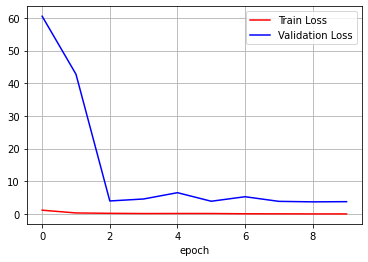

In [34]:
plt.plot(train_history.history['loss'], color='r', label='Train Loss')
plt.plot(train_history.history['val_loss'], color='b', label='Validation Loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

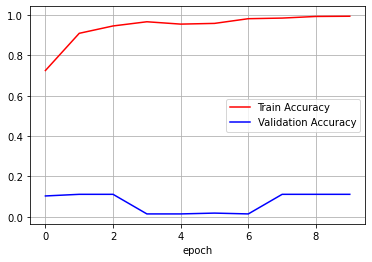

In [35]:
plt.plot(train_history.history['accuracy'], color='r', label='Train Accuracy')
plt.plot(train_history.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()